# Handling Time-Series Data with Pandas
Time-series data is a type of data that is dependent on time and
changes with time. For instance, the hourly temperature for a specific
place changes after every hour and is dependent on time. Similarly,
the stock prices of a particular company change with every passing
day.

## 1. Introduction to Time-Series in Pandas
The TimeStamp data type in Pandas is the most basic unit for storing
time-step data. Let’s see this with the help of an example.
The following script uses the date_range() function to create a
collection that contains dates in the form of time stamps.

In [1]:
# Import the pandas library and alias it as pd
import pandas as pd

# Import the numpy library and alias it as np (not used in this snippet)
import numpy as np

# Import the datetime class from the datetime module (also not used in this snippet)
from datetime import datetime

# Create a sequence of dates from January 1, 2021 to June 30, 2021 (inclusive)
dates = pd.date_range(start='1/1/2021', end='6/30/2021')

# Print the number of dates in the range
print(len(dates))  # Output: 181 (number of days between Jan 1 and Jun 30 inclusive)

# Print the list of dates
print(dates)  # Output: DatetimeIndex object with daily frequency

181
DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', length=181, freq='D')


In [2]:
# 'dates' is assumed to be a Pandas Series, DataFrame column, or list containing datetime objects
# 'dates[0]' accesses the first element in the 'dates' object
# 'type(...)' returns the data type of that first element

type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [3]:
# Create a DataFrame from the list 'dates' with a single column named 'Date'
date_df = pd.DataFrame(dates, columns=['Date'])

# Add a new column 'Temperature' to the DataFrame
# Fill it with random integers between 0 (inclusive) and 50 (exclusive)
# The number of random values generated matches the number of dates
date_df['Temperature'] = np.random.randint(
    0,               # Lower bound (inclusive)
    50,              # Upper bound (exclusive)
    size=(len(dates))  # Number of values to generate = length of 'dates' list
)

# Display the first 5 rows of the DataFrame to preview the data
date_df.head()

,Date,Temperature
0,2021-01-01,44
1,2021-01-02,0
2,2021-01-03,34
3,2021-01-04,49
4,2021-01-05,46


<Axes: >

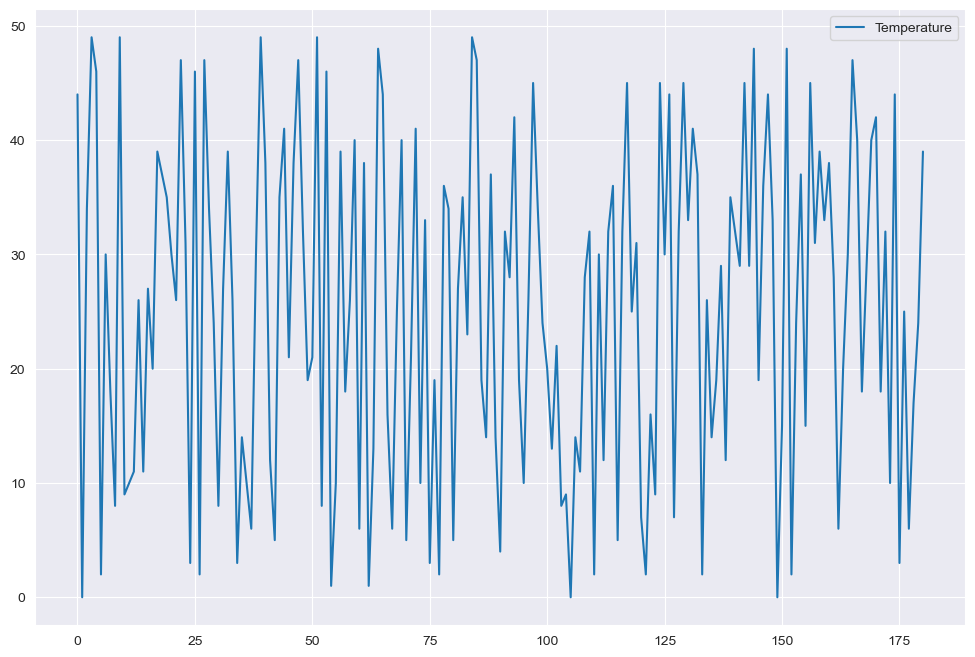

In [4]:
# Import the seaborn library for data visualization
import seaborn as sns

# Set the seaborn plotting style to "darkgrid" for better aesthetics
sns.set_style("darkgrid")

# Plot a line graph using the 'Temperature' column from the 'date_df' DataFrame
# The figure size is set to 12 inches wide and 8 inches tall
date_df.plot.line(y='Temperature', figsize=(12, 8))

## 2. Time Resampling and Shifting
In this section, you will see how to resample and shift the time series
data with Pandas.
You will work with Google Stock Price data from 6th
January 2015 to
7th
January 2020. The dataset is available in the Data
folder of the
book resources by the name google_data.csv. The following script
reads the data into a Pandas dataframe.

In [5]:


# Importing the Seaborn library for visualization
import seaborn as sns

# Importing the Pandas library for data manipulation
import pandas as pd

# Setting the style of the plots to "darkgrid" for better visual appeal
sns.set_style("darkgrid")

# URL contains Google stock price from 2025-1-2 to 2025-7-25
url = "https://raw.githubusercontent.com/duochen/data-science-bootcamp/refs/heads/main/Lecture04/Exercises/google_stock_prices.csv"

# Reading the Google stock data from a CSV file into a Pandas DataFrame
google_stock = pd.read_csv(url)

# Displaying the first 5 rows of the DataFrame to get a quick overview of the data
google_stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


<Axes: xlabel='Date'>

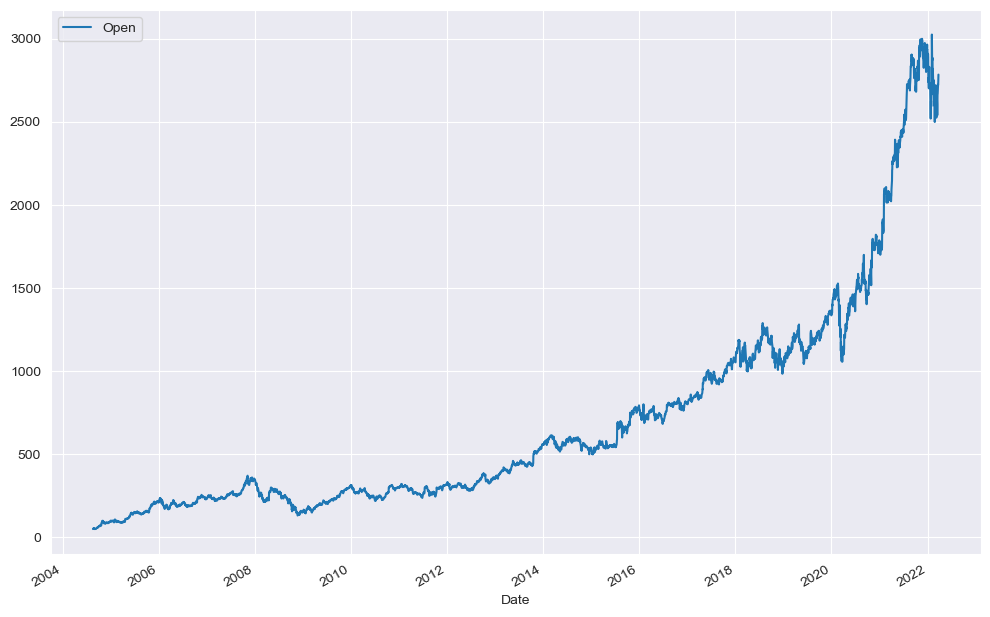

In [6]:
# Convert the 'Date' column to datetime format using pandas' to_datetime function
google_stock['Date'] = google_stock['Date'].apply(pd.to_datetime)

# Set the 'Date' column as the index of the DataFrame
google_stock.set_index('Date', inplace=True)

# Plot a line chart of the 'Open' prices with a figure size of 12 inches by 8 inches
google_stock.plot.line(y='Open', figsize=(12, 8))

### 2.1. Time Sampling with Pandas
Time sampling refers to grouping data over a certain period using an
aggregate function such as min, max, count, mean, etc.
To do resampling, you have to use the resample() function. The
timeframe is passed to the rule attribute of the resample() function.
Finally, you have to append the aggregate function at the end of the
resample() function.
The following script shows the average values for all the columns of
Google stock data, grouped by year. In the output, you can see five
rows since our dataset contains five years of Google stock prices.
Here, we pass A as the value for the rule attribute, which refers to
yearly data.

In [9]:
# Resample the 'google_stock' DataFrame to yearly frequency using calendar year end ('YE'),
# and calculate the mean for each resampled year.
google_stock.resample(rule='YE').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,75.791855,77.427480,74.550881,75.976614,75.976614,1.813565e+07
2005-12-31,139.004739,140.639071,137.290088,139.018562,139.018562,2.135695e+07
2006-12-31,206.155438,208.419296,203.364480,205.798448,205.798448,1.696810e+07
2007-12-31,269.683608,272.360707,266.764753,269.644864,269.644864,1.086714e+07
2008-12-31,233.369932,237.408059,228.564869,232.658667,232.658667,1.263058e+07
2009-12-31,219.704962,222.216045,217.452512,220.064231,220.064231,7.011298e+06
2010-12-31,268.424416,270.744831,265.659627,268.079627,268.079627,6.353451e+06
2011-12-31,284.870722,287.470307,282.086252,284.771855,284.771855,6.150283e+06
2012-12-31,321.716956,324.462722,318.796357,321.729969,321.729969,5.203541e+06


In [11]:
# Resample the google_stock DataFrame to monthly frequency ('ME') 
# and calculate the mean for each month.
google_stock.resample(rule='ME').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-31,52.752196,54.053499,51.578245,52.683795,52.683795,1.484521e+07
2004-09-30,56.044616,57.517756,55.534106,56.670241,56.670241,1.011884e+07
2004-10-31,76.321559,78.349063,74.764288,76.692168,76.692168,2.445817e+07
2004-11-30,89.172029,91.070594,87.169550,88.836454,88.836454,2.641110e+07
2004-12-31,90.789198,92.091636,89.852352,90.975975,90.975975,1.319972e+07
...,...,...,...,...,...,...
2021-11-30,2944.850946,2966.002360,2913.110003,2935.132871,2935.132871,1.448519e+06
2021-12-31,2902.532726,2928.360918,2872.189564,2903.024092,2903.024092,1.408395e+06
2022-01-31,2725.372998,2763.125989,2684.676001,2719.239014,2719.239014,1.918015e+06


In [15]:
# Resample the 'Open' column of the google_stock DataFrame to annual frequency ('AE'),
# then calculate the mean 'Open' price for each year.

google_stock['Open'].resample('YE').mean()

Date
2004-12-31      75.791855
2005-12-31     139.004739
2006-12-31     206.155438
2007-12-31     269.683608
2008-12-31     233.369932
2009-12-31     219.704962
2010-12-31     268.424416
2011-12-31     284.870722
2012-12-31     321.716956
2013-12-31     442.252351
2014-12-31     568.959666
2015-12-31     620.044801
2016-12-31     763.651865
2017-12-31     939.454622
2018-12-31    1122.564423
2019-12-31    1190.177697
2020-12-31    1477.669486
2021-12-31    2482.910911
2022-12-31    2713.341407
Freq: YE-DEC, Name: Open, dtype: float64

<Axes: xlabel='Date'>

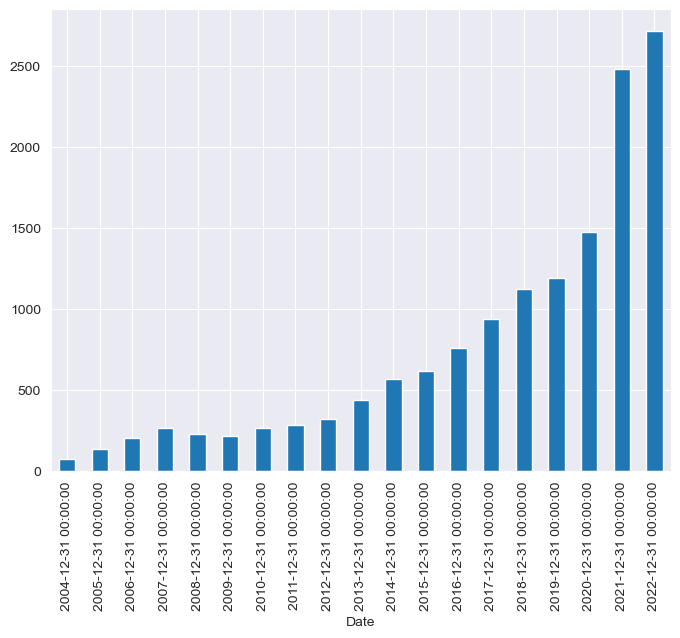

In [16]:
# Resample the 'Open' column of the google_stock DataFrame to annual frequency ('YE') 
# and compute the mean opening price for each year
annual_mean_open = google_stock['Open'].resample('YE').mean()

# Plot the annual mean opening prices as a bar chart with a figure size of 8x6 inches
annual_mean_open.plot(kind='bar', figsize=(8, 6))

<Axes: xlabel='Date'>

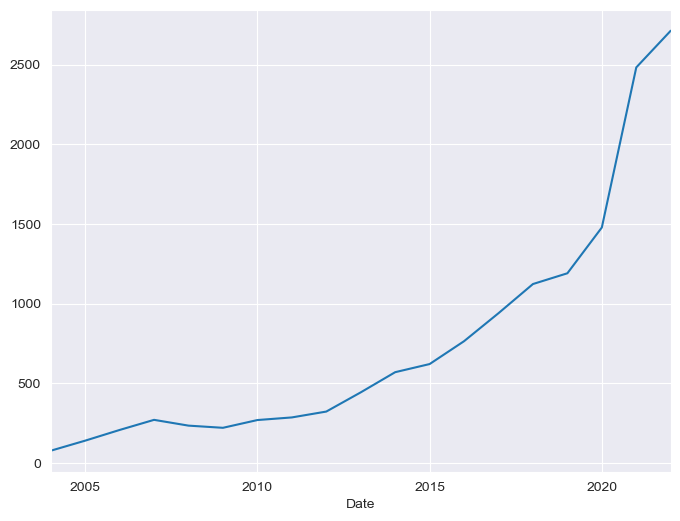

In [22]:
# Resample the 'Open' column of the google_stock DataFrame to annual frequency ('YE'),
# then calculate the mean of each year's 'Open' prices.
# Finally, plot the result as a line chart with figure size 8x6.

(
    google_stock['Open']           # Select the 'Open' column
    .resample('YE')                 # Resample to annual frequency
    .mean()                        # Calculate the mean per year
    .plot(                         # Plot the data
        kind='line',
        figsize=(8, 6)
    )
)

### 2.2. Time Shifting with Pandas
Time-shifting refers to shifting rows forward or backward. To shift
rows forward, you can use the shift()
function and pass it a positive
value. For instance, the following script shifts three rows ahead and
prints the header of the dataset.

In [23]:
# Shift the rows of the 'google_stock' DataFrame **down** by 3 positions.
# This means each row's data is moved 3 rows later, and the top 3 rows are filled with NaN.
# This is often used to create lag features for time series analysis.
shifted_data = google_stock.shift(3)

# Display the first 5 rows of the shifted DataFrame.
# These will be NaN in the first 3 rows due to the shift.
shifted_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0
2004-08-25,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0


In [24]:
# Shift the 'google_stock' DataFrame **up** by 3 rows
# This means that each row's data will move 3 rows earlier (i.e., future data is moved into the past)
# The last 3 rows will be filled with NaN as there's no data to pull from below
shifted_data = google_stock.shift(-3)

# Display the last 5 rows of the shifted DataFrame to see the NaN values at the bottom
shifted_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-18,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700.0
2022-03-21,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900.0
2022-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-23,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-24,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Rolling Window Functions
Rolling window functions are aggregate functions applied on a set of
a specific number of records, which is called the window for a window
function. For instance, with rolling window functions, you can find the
average of values in a specific column for the previous two rows.

In [26]:
# URL contains Google stock price from 2025-1-2 to 2025-7-25
url = "https://raw.githubusercontent.com/duochen/data-science-bootcamp/refs/heads/main/Lecture04/Exercises/google_stock_prices.csv"

# Load the CSV file containing Google stock data into a DataFrame
google_stock = pd.read_csv(url)

# Convert the 'Date' column from string format to datetime objects
google_stock['Date'] = google_stock['Date'].apply(pd.to_datetime)

# Set the 'Date' column as the index of the DataFrame (useful for time series analysis)
google_stock.set_index('Date', inplace=True)

# Display the first 5 rows of the DataFrame to preview the data
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [27]:
# Calculate the rolling (moving) average of the 'Volume' column using a window size of 2
# This means it will average every two consecutive values in the 'Volume' column
google_stock['Roll. Volumne Avg'] = google_stock['Volume'].rolling(2).mean()

# Display the first 5 rows of the DataFrame to see the result
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Roll. Volumne Avg
Date,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,33746719.5
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,20545234.5
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,16751731.5
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,12217969.5


In [28]:
# Calculate the rolling sum over a 2-row window on the 'Volume' column
# This means each value will be the sum of the current and previous row's 'Volume'
google_stock['Roll. Sum Avg'] = google_stock['Volume'].rolling(2).sum()

# Display the first 5 rows of the DataFrame to check the new column
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Roll. Volumne Avg,Roll. Sum Avg
Date,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,33746719.5,67493439.0
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,20545234.5,41090469.0
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,16751731.5,33503463.0
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,12217969.5,24435939.0


In [29]:
# Calculate the rolling minimum of the 'Volume' column over a window of 3 rows
google_stock['Roll. Min Avg'] = google_stock['Volume'].rolling(3).min()

# Display the first 5 rows of the updated DataFrame
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Roll. Volumne Avg,Roll. Sum Avg,Roll. Min Avg
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,33746719.5,67493439.0,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,20545234.5,41090469.0,18256126.0
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,16751731.5,33503463.0,15247337.0
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,12217969.5,24435939.0,9188602.0


In [30]:
# Calculate the rolling standard deviation (with a window of 3) on the 'Volume' column
google_stock['Roll. std Avg'] = google_stock['Volume'].rolling(3).std()

# Display the first 5 rows of the updated DataFrame
google_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Roll. Volumne Avg,Roll. Sum Avg,Roll. Min Avg,Roll. std Avg
Date,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN,NaN,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,33746719.5,67493439.0,NaN,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,20545234.5,41090469.0,18256126.0,1.410908e+07
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,16751731.5,33503463.0,15247337.0,3.820461e+06
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,12217969.5,24435939.0,9188602.0,4.618461e+06
